<a href="https://colab.research.google.com/github/ryyhan/RandomCodes/blob/main/OutlierDetection(Percentiles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OutlierDetection**

- Using Percentiles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housePricePrediction.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
minimumThreshold = df['price_per_sqft'].quantile(0.05)
minimumThreshold

3107.8500000000004

In [6]:
maximumThreshold = df['price_per_sqft'].quantile(0.95)
maximumThreshold

15312.099999999984

In [7]:
updatedDF = df[(df['price_per_sqft']>minimumThreshold) & (df['price_per_sqft']<maximumThreshold)]
updatedDF

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [8]:
print(f"shape before removing outliers{df.shape} and after removing outliers {updatedDF.shape}")

shape before removing outliers(13200, 7) and after removing outliers (11880, 7)




---


- using Standard Deviation

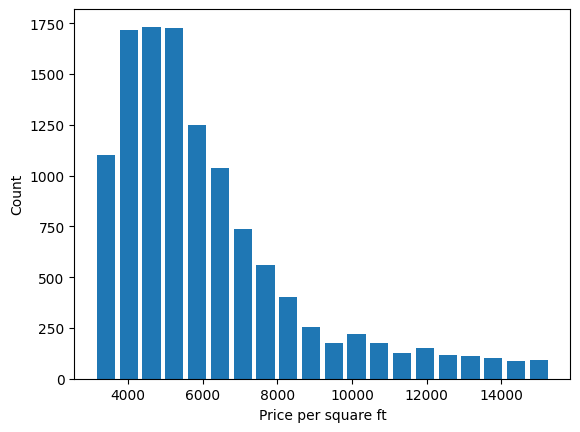

In [9]:
plt.hist(updatedDF.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [10]:
max_limit = updatedDF['price_per_sqft'].mean() + 3*updatedDF['price_per_sqft'].std()
max_limit

13651.600565833673

In [11]:
min_limit = updatedDF['price_per_sqft'].mean() - 3*updatedDF['price_per_sqft'].std()
min_limit

-1382.557804890911

In [12]:
deviatedDF = updatedDF[(updatedDF['price_per_sqft'] < max_limit) & (updatedDF['price_per_sqft'] > min_limit)]

In [13]:
print(f"Shape before using standard deviation {updatedDF.shape} and after {deviatedDF.shape}")

Shape before using standard deviation (11880, 7) and after (11629, 7)


- using Z-score normalization

In [14]:
deviatedDF['zscore'] = ((deviatedDF['price_per_sqft']) - (deviatedDF['price_per_sqft']).mean())/deviatedDF['price_per_sqft'].std()

<ipython-input-14-f0ee5006e69b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deviatedDF['zscore'] = ((deviatedDF['price_per_sqft']) - (deviatedDF['price_per_sqft']).mean())/deviatedDF['price_per_sqft'].std()


In [15]:
normalizedDF = deviatedDF[(deviatedDF['zscore'] > -4) & (deviatedDF['zscore'] < 4)]
normalizedDF

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-1.021191
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.606513
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.746852
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,0.131396
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.771750
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,0.260417
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.332397
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,2.334259
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.315424


In [16]:
print(f"Shape before using zscore {deviatedDF.shape} and after {normalizedDF.shape}")

Shape before using zscore (11629, 8) and after (11629, 8)
